In [1]:
import glob
import shutil
import cv2
import os
from PIL import Image
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import * 

import warnings
# Ignore waring
warnings.filterwarnings('ignore')


In [ ]:
#!pip install tensorflow-gpu==2.0.0


In [ ]:
!nvidia-smi


Tue May  2 05:52:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#covid_path = ['/COVID/images/*','/Normal/images/*']

In [ ]:
#train_path = '/content/drive/MyDrive/Machine Learning/covid_not'

In [2]:
name_list = glob.glob("E:/AI-final/Quang not covid/VGG16_covid-main/data/aaaacovi/covid_not/COVID/images/*")


#Load the training images and labels
X = []
y = []
for name in name_list:
  y.append(1)
  img = cv2.imread(name) 
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(224,224)) 
  X.append((img))
len(X)

3616

In [3]:
name_list = glob.glob("E:/AI-final/Quang not covid/VGG16_covid-main/data/aaaacovi/covid_not/Normal/images/*")

for name in name_list:
  y.append(0)
  img = cv2.imread(name) 
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(224,224)) 
  X.append((img))
len(X)

7841

In [4]:
X = np.array(X)
y = tf.keras.utils.to_categorical(y, num_classes=2)

In [5]:
print(len(X))
print(X.shape)
print(y.shape)

7841
(7841, 224, 224, 3)
(7841, 2)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6272, 224, 224, 3) (1569, 224, 224, 3)
(6272, 2) (1569, 2)


Input Nomarlize

In [7]:

X_train = X_train /255
X_test = X_test / 255

print(X_train.shape)
print(X_test.shape)

(6272, 224, 224, 3)
(1569, 224, 224, 3)


In [8]:
# inp = Input(shape = (224,224,3))

# cnn = Conv2D(filters = 32,kernel_size = (3),activation ='relu')(inp)
# pooling = MaxPooling2D(pool_size =(3))(cnn)
# drop = Dropout(0.25)(pooling)

# cnn = Conv2D(filters = 64,kernel_size = (3),activation ='relu')(drop)
# pooling = MaxPooling2D(pool_size =(3))(cnn)
# drop = Dropout(0.25)(pooling)

# cnn = Conv2D(filters = 64, kernel_size =(3),activation ='relu')(drop)
# pooling = MaxPooling2D(pool_size =(3))(cnn)
# drop = Dropout(0.25)(pooling)

# cnn = Conv2D(filters = 128, kernel_size =(3),activation ='relu')(drop)
# pooling = MaxPooling2D(pool_size =(3))(cnn)
# drop = Dropout(0.25)(pooling)


# f =Flatten()(pooling)

# fc1 = Dense(units = 128, activation ='relu')(f)
# out = Dense(units = 2, activation ='softmax')(fc1)

# model =Model(inputs = inp,outputs =out)
# model.summary()
inp = Input(shape = (224,224,3))

cnn = Conv2D(filters = 32,kernel_size = (3),activation ='relu')(inp)

cnn = Conv2D(filters = 64,kernel_size = (3),activation ='relu')(cnn)
pooling = MaxPooling2D(pool_size =(3))(cnn)
drop = Dropout(0.25)(pooling)

cnn = Conv2D(filters = 64, kernel_size =(3),activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(3))(cnn)
drop = Dropout(0.25)(pooling)

cnn = Conv2D(filters = 128, kernel_size =(3),activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(3))(cnn)
drop = Dropout(0.25)(pooling)

f =Flatten()(drop)

fc1 = Dense(units = 128, activation ='relu')(f)
out = Dense(units = 2, activation ='softmax')(fc1)

model =Model(inputs = inp,outputs =out)
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)       

In [9]:

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0

In [11]:


history = model.fit(X_train,y_train,batch_size = 16, epochs =20,validation_data =(X_test,y_test))

Epoch 1/20
392/392 [==============================] - 676s 2s/step - loss: 0.3741 - accuracy: 0.8355 - val_loss: 0.2691 - val_accuracy: 0.8980
Epoch 2/20
392/392 [==============================] - 746s 2s/step - loss: 0.2361 - accuracy: 0.9048 - val_loss: 0.2234 - val_accuracy: 0.9178
Epoch 3/20
392/392 [==============================] - 778s 2s/step - loss: 0.1941 - accuracy: 0.9236 - val_loss: 0.1779 - val_accuracy: 0.9407
Epoch 4/20
392/392 [==============================] - 667s 2s/step - loss: 0.1737 - accuracy: 0.9314 - val_loss: 0.2482 - val_accuracy: 0.8853
Epoch 5/20
392/392 [==============================] - 622s 2s/step - loss: 0.1503 - accuracy: 0.9428 - val_loss: 0.1855 - val_accuracy: 0.9324
Epoch 6/20
392/392 [==============================] - 647s 2s/step - loss: 0.1393 - accuracy: 0.9474 - val_loss: 0.1604 - val_accuracy: 0.9452
Epoch 7/20
392/392 [==============================] - 609s 2s/step - loss: 0.1137 - accuracy: 0.9570 - val_loss: 0.1477 - val_accuracy: 0.9535

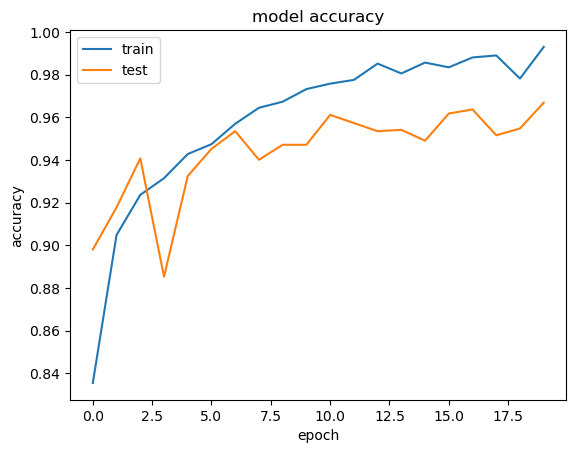

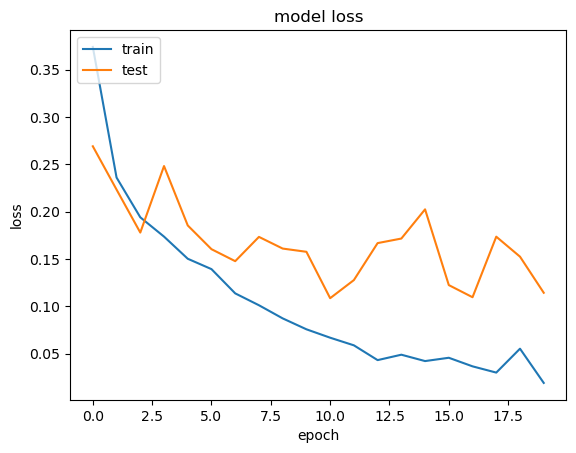

In [12]:
from matplotlib import pyplot  as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [13]:
model.save('model1.h5')

In [15]:
model1 = load_model('model1.h5')

(888, 882, 3)


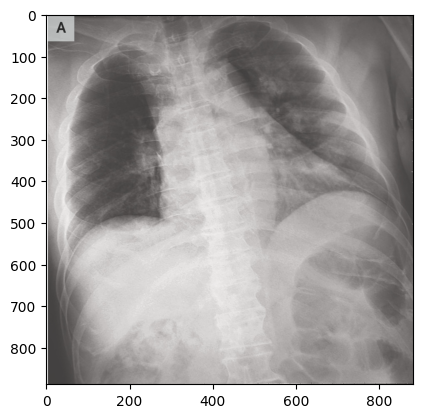

In [ ]:
import cv2
img = cv2.imread('/content/covid2.jpeg')
print(img.shape)
plt.imshow(img)

(888, 882)


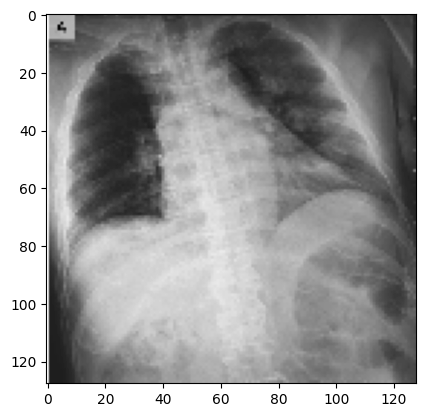

In [ ]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_new = cv2.resize(gray_img,(224,224))
print(gray_img.shape)
plt.imshow(img_new,cmap='gray')

In [ ]:
img_scaled =np.array([img_new/255.])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)


(1, 128, 128)


ValueError: ignored